## Day 32 Lecture 1 Assignment

In this assignment, we will learn about K nearest neighbor regression. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

The meaning of the different columns can be found here: https://www.kaggle.com/tonypriyanka2913/employee-absenteeism

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.shape

(740, 21)

In [4]:
absent.info()
absent.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


Find which variables have the highest pairwise correlation and remove them from our dataset. Additionally, try to think of which variables are correlated by looking at the column names and remove those columns as well.

Note: When choosing between two categorical variables that are correlated, you often want to keep the one with fewer unique values. Why might that be? (Think about the cons of KNN.)

In [5]:
absent['Service time'].nunique()

18

In [6]:
absent['Hit target'].nunique()

13

In [7]:
absent['ID'].nunique()

36

In [8]:
absent['Reason for absence'].nunique()

28

In [9]:
absent['Education'].nunique()

4

In [10]:
absent['Son'].nunique()

5

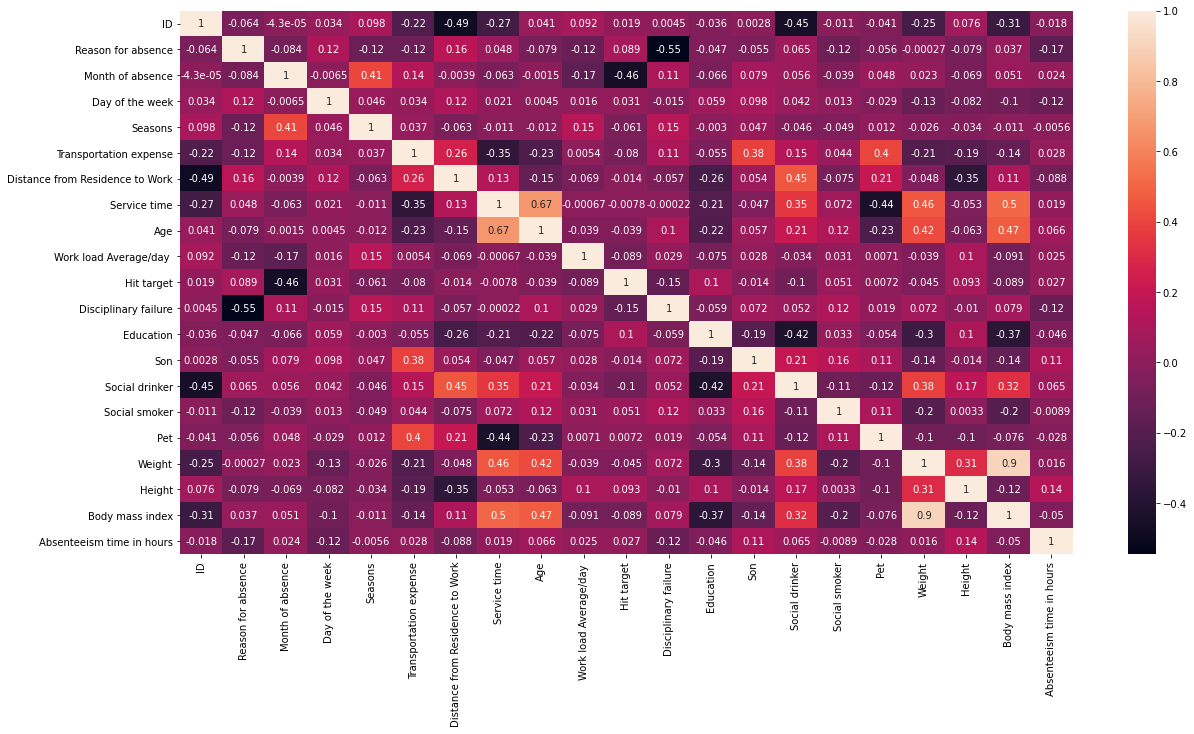

In [11]:
# answer below:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(absent.corr(), annot=True)
plt.show()

In [12]:
absent2 = absent[['Absenteeism time in hours', 'Seasons', 'Distance from Residence to Work', 'Day of the week',
                  'Son', 'Transportation expense', 'Disciplinary failure', 'Age', 'Work load Average/day ', 'Social smoker',
                  'Hit target']]    

In [13]:
absent2.head()

,Absenteeism time in hours,Seasons,Distance from Residence to Work,Day of the week,Son,Transportation expense,Disciplinary failure,Age,Work load Average/day,Social smoker,Hit target
0,4,1,36,3,2,289,0,33,239.554,0,97
1,0,1,13,3,1,118,1,50,239.554,0,97
2,2,1,51,4,0,179,0,38,239.554,0,97
3,4,1,5,5,2,279,0,39,239.554,1,97
4,2,1,36,5,2,289,0,33,239.554,0,97


Figure out which columns actually contain sneaky categorical variables and turn those into dummy variables.

In [14]:
# answer below:
#change Seasons, Day of the Week and Son to dummy
season = pd.get_dummies(absent2['Seasons'], drop_first=True)
day = pd.get_dummies(absent2['Day of the week'], drop_first=True)
child = pd.get_dummies(absent2['Son'], drop_first=True)
hit = pd.get_dummies(absent2['Hit target'], drop_first=True)

In [15]:
absent2 = pd.concat([absent2, season, day, child, hit], axis=1)
absent2 = absent2.drop(['Seasons', 'Day of the week', 'Son', 'Hit target'], axis=1)
absent2.head()

,Absenteeism time in hours,Distance from Residence to Work,Transportation expense,Disciplinary failure,Age,Work load Average/day,Social smoker,2,3,4,3,4,5,6,1,2,3,4,87,88,91,92,93,94,95,96,97,98,99,100
0,4,36,289,0,33,239.554,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,13,118,1,50,239.554,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,51,179,0,38,239.554,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,5,279,0,39,239.554,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2,36,289,0,33,239.554,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Split the data into train and test with test containing 20% of the data, then scale your features.

In [16]:
# answer below:
from sklearn.model_selection import train_test_split
X = absent2.drop(['Absenteeism time in hours'], axis=1)
y = absent2['Absenteeism time in hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
#scaling features
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

Train a series of KNN regression models with a range of K values. For each K value, use cross validation of the training set and find the average RMSE score. Make a plot of K versus average RMSE. What is the best value of K?

In [18]:
# answer below
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error

k_list = np.arange(1, 17, 2)
train_errors = []
test_errors = []
for i in k_list:
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train_scale, y_train)
  y_pred_train = knn.predict(X_train_scale)
  y_pred_test = knn.predict(X_test_scale)
  train_errors.append(mean_squared_error(y_train, y_pred_train, squared=False))
  test_errors.append(mean_squared_error(y_test, y_pred_test, squared=False))

print('Training errors:', train_errors)
print('Test errors:', test_errors)

Training errors: [5.468429044635783, 10.364970820997044, 11.552936329688562, 11.986996539802156, 12.13020318582213, 12.255519604541712, 12.4191198328238, 12.381758475392054]
Test errors: [18.027756377319946, 13.259819863890415, 13.423064055894566, 13.247833862213716, 12.944711876498664, 13.134333689428896, 13.096135147333252, 13.102875460956858]


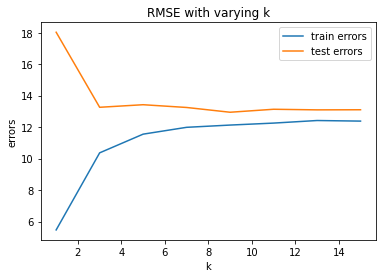

In [19]:
plt.plot(k_list, train_errors, label='train errors')
plt.plot(k_list, test_errors, label='test errors')
plt.xlabel('k')
plt.ylabel('errors')
plt.title('RMSE with varying k')
plt.legend()
plt.show()

Using your best K, fit a model to all your training data and show the RMSE for the training and testing sets.

In [22]:
# answer below
#using k=9
knn1 = KNeighborsRegressor(n_neighbors=9)
knn1.fit(X_train_scale, y_train)

y_pred_train2 = knn1.predict(X_train_scale)
y_pred_test2 = knn1.predict(X_test_scale)
train_rmse = mean_squared_error(y_train, y_pred_train2, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test2, squared=False)

print('Train RMSE: {:.5f}\nTest RMSE: {:.5f}'.format(train_rmse, test_rmse))

Train RMSE: 12.13020
Test RMSE: 12.94471


Create a homoscedasticity plot (also called residual plot). How is your model performing? What ideas do you have to improve the model?

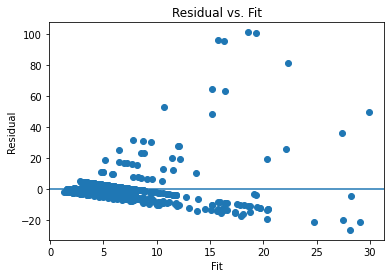

In [27]:
# answer below
#residual plot
res = y_train - y_pred_train2
plt.scatter(y_pred_train2, res)
plt.xlabel('Fit')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Fit')
plt.show()

The model is not the best as there's some sparsity above the 0 line for the points whereas it seems more cluster below the line. This could be because of low amount of data or I didn't pick enough/"correct" features for my model.